**Megan Rochella - 0706022210028**

**Breast Cancer Dataset**

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [170]:
df = pd.read_csv('https://raw.githubusercontent.com/mrochella/datamining/refs/heads/main/breast-cancer.csv')
df.head(10)

# Import dataset to pandas and show top 10 rows of the data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


## Exploratory Data Analysis

In [171]:
df.info()

# As we can see from the info, the total of the data are 569, total of columns are 32, and no missing values
# Data types are int, object and float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [172]:
description = df.describe()

description
# The code calculates the count of non-null entries, the mean (average) values, standard deviation (showing how spread out the data is),
# and the minimum, maximum, and quartiles (25%, 50%, 75%).

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [173]:
print(df['diagnosis'].value_counts(dropna=False))
# Print nique values count for categorical column (in this case target column "diagnosis")
# The dataset has more outcomes of B (almost 2x the M value)
# B stands for Benign or non-cancerous, while M stands for Malignant (cancerous)

diagnosis
B    357
M    212
Name: count, dtype: int64


In [174]:
df.isnull().sum()
# Checks whether there is still a null value in each column which there are none (0)

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [175]:
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
# Encodes value from the column 'diagnosis' to  M = 1 and B = 0

df.head(5)
# Shows top 5 rows of the data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


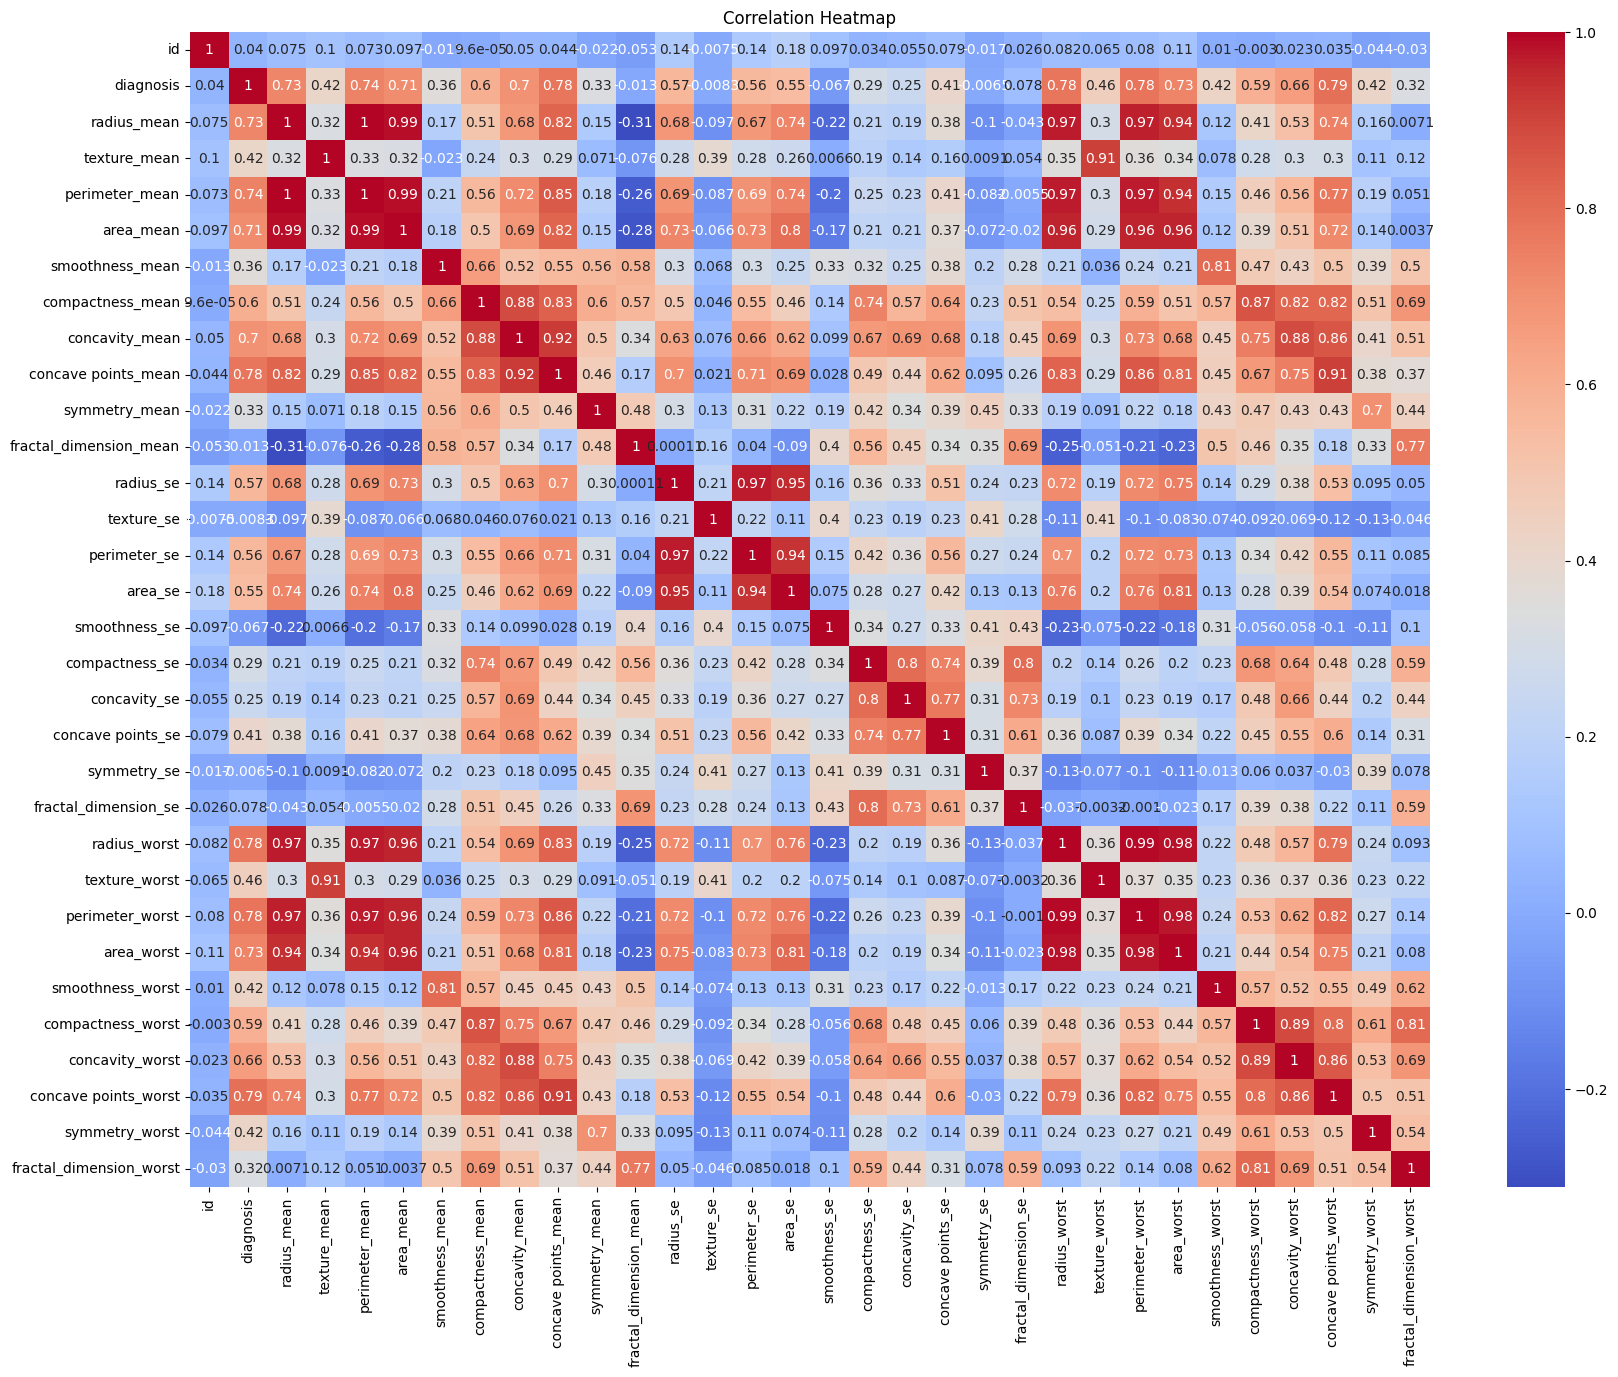

In [176]:
plt.figure(figsize=(20, 15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.show()
# The strongest positive relationships which are 0.99 are radius_mean and area_mean, perimeter_mean and area_mean, perimeter worst and radius worst
# Correlation of 0.99 means if one of the variables increases, the other is very likely to increase as well
# This indicates that they are closely linked, so changes in one will almost certainly reflect changes in the other

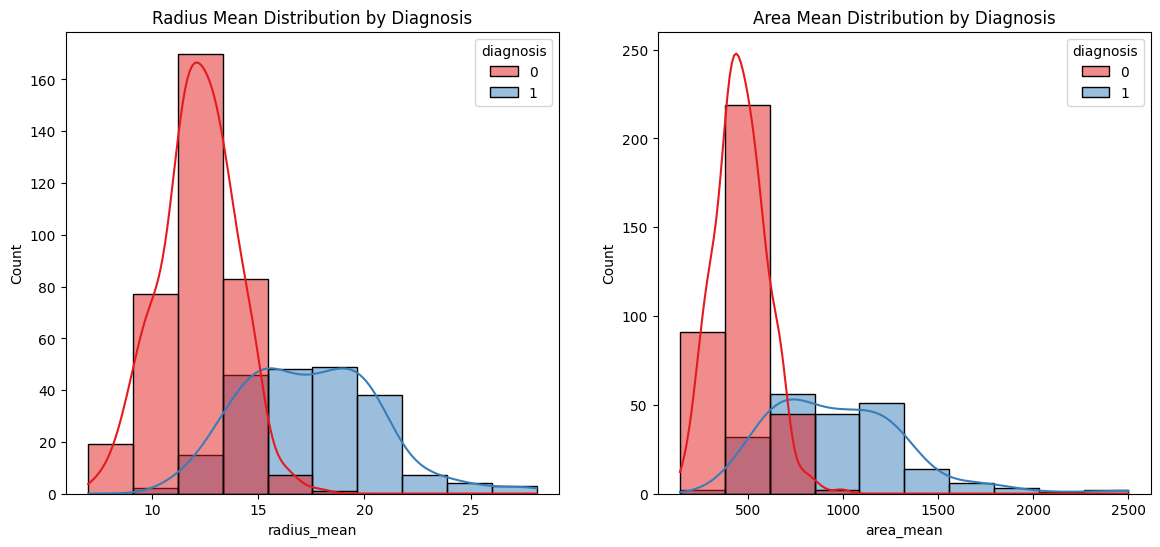

In [177]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='radius_mean', hue='diagnosis', kde=True, bins=10, palette='Set1')
plt.title('Radius Mean Distribution by Diagnosis')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='area_mean', hue='diagnosis', kde=True, bins=10, palette='Set1')
plt.title('Area Mean Distribution by Diagnosis')

plt.show()
# These two side-by-side histograms allow a visual comparison of the radius_mean and area_mean distributions, differentiated by diagnosis (malignant or benign)

<ipython-input-178-7c96e3dfc21d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='diagnosis', y='texture_mean', palette='Set2')


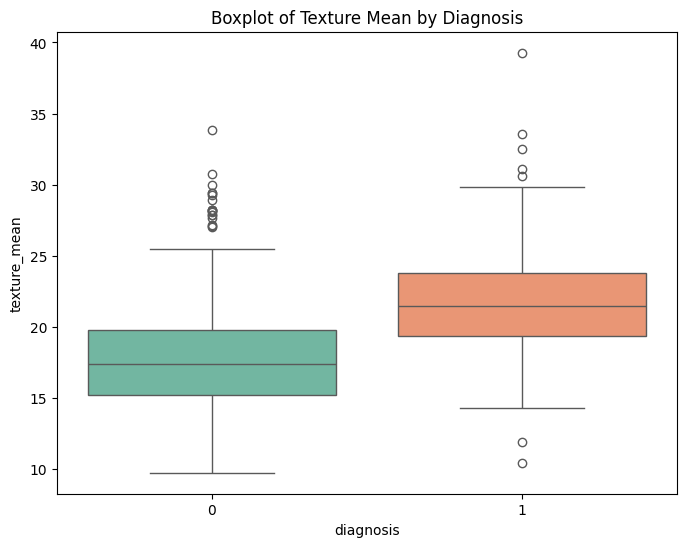

In [178]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='diagnosis', y='texture_mean', palette='Set2')
plt.title('Boxplot of Texture Mean by Diagnosis')

plt.show()
# This boxplot visualizes the distribution of the texture_mean feature for different diagnoses (malignant and benign)

In [179]:
X = df.drop(['diagnosis', 'id'],axis=1)  # This line creates a new DataFrame X by removing the column labeled 'diagnosis' and 'id' from the original DataFrame
y = df['diagnosis'] # This column typically represents the target variable or label that the model will learn to predict based

In [180]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# It splits the feature set X and the target variable y into training and testing subsets.
# The 20% of the data will be used for testing, while 80% will be used for training.

X_train.shape, X_test.shape
# 'shape' method is used to check how many rows and columns are associated with each train or test data
# X_train has 455 rows/data and 30 columns for training data
# X_test has 114 rows/data and 30 columns for testing data

((455, 30), (114, 30))

## Decision Tree

## 1. Criterion Entropy

In [181]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
clf_en.fit(X_train, y_train)

# Decision Tree Modelling using Criterion Entropy

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [182]:
y_pred_en = clf_en.predict(X_test)
# Predicting the 'X_test' using Criterion Entropy

print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))
# Shows the accuracy score based on the y_test and y_pred
# Resulting with a high 95% accuracy

Model accuracy score with criterion entropy: 0.9561


In [183]:
y_train_en = clf_en.predict(X_train)
test_accuracy = accuracy_score(y_test, y_pred_en)
training_accuracy = accuracy_score(y_train, y_train_en)

print('Testing set score: {0:0.4f}'.format(test_accuracy))
print('Training set score: {0:0.4f}'.format(training_accuracy))
# The margin is only less than 5%, so we conclude that the model is well-fitted

Testing set score: 0.9561
Training set score: 0.9802


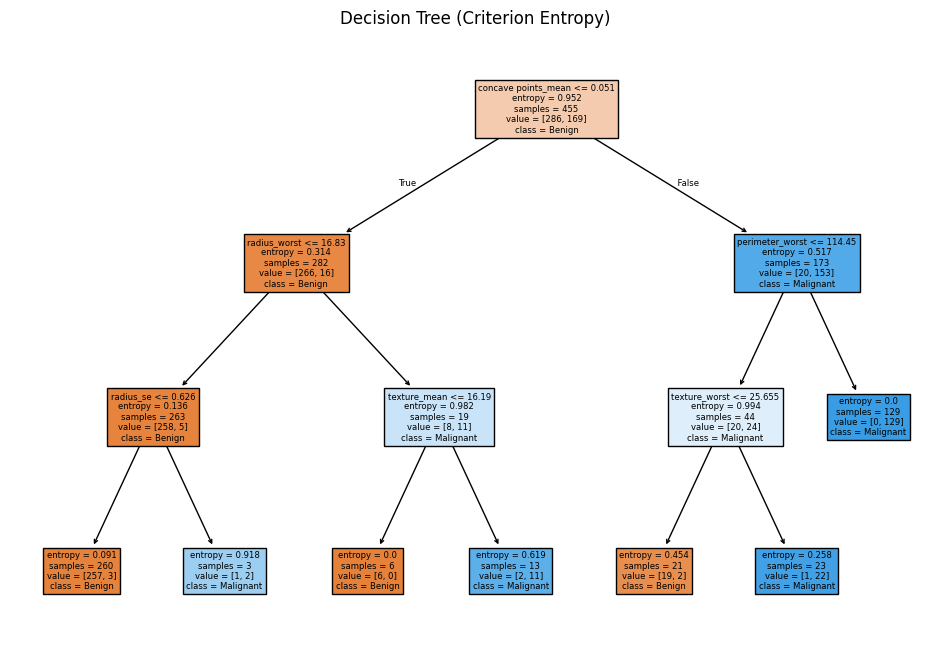

In [184]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_en,
               feature_names=X.columns.tolist(),
               class_names=['Benign', 'Malignant'],
               filled=True)
plt.title("Decision Tree (Criterion Entropy)")

plt.show()
# Creates the decision tree of the Criterion Entropy algorithm using matplotlib

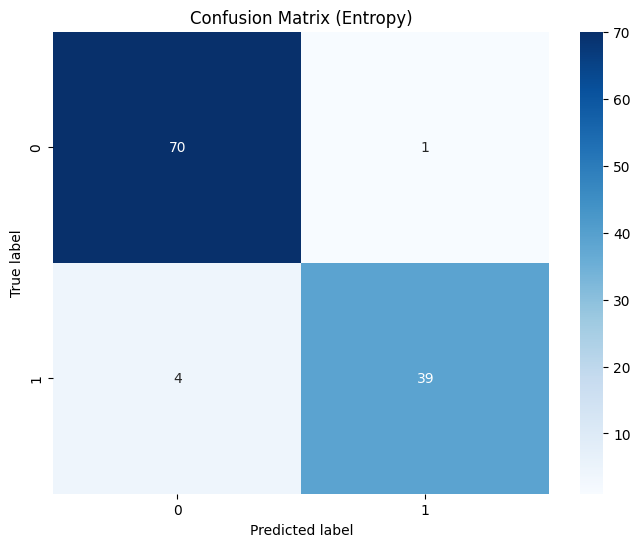

In [185]:
cm = confusion_matrix(y_test, y_pred_en)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Entropy)')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()
# Confusionn matrix of criterion entropy results in 109 right predcitions out of 114 datas

## 2. Gini Index

In [186]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(X_train, y_train)

# Decision Tree Modelling using Criterion Gini

DecisionTreeClassifier(max_depth=3, random_state=0)

In [187]:
y_pred_gini = clf_gini.predict(X_test)
# Predicts the 'X_test' using Criterion Gini

print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))
# Shows the accuracy score based on the 'y_test' and 'y_pred'
# Resulting with a high 93% accuracy

Model accuracy score with criterion gini index: 0.9386


In [188]:
y_train_gini = clf_gini.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_gini)
training_accuracy = accuracy_score(y_train, y_train_gini)

print('Testing set score: {0:0.4f}'.format(test_accuracy))
print('Training set score: {0:0.4f}'.format(training_accuracy))
# The significant gap between the training score (0.9780) and the testing score (0.9386) suggests that the model may be overfitting

Testing set score: 0.9386
Training set score: 0.9780


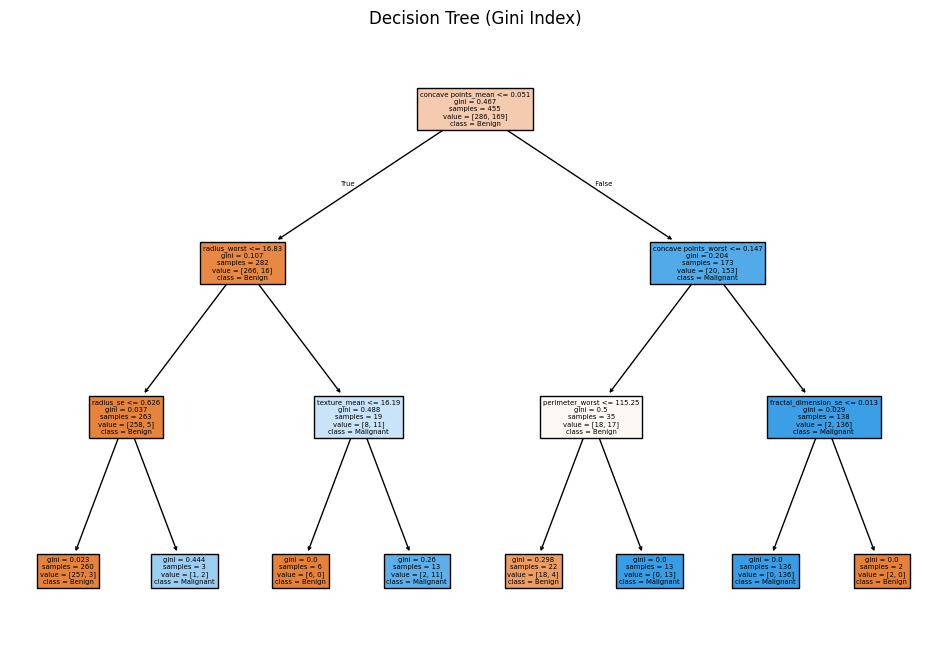

In [189]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini,
               feature_names=X.columns.tolist(),
               class_names=['Benign', 'Malignant'],
               filled=True)
plt.title("Decision Tree (Gini Index)")

plt.show()
# Creates the decision tree of the Criterion gini algorithm using matplotlib

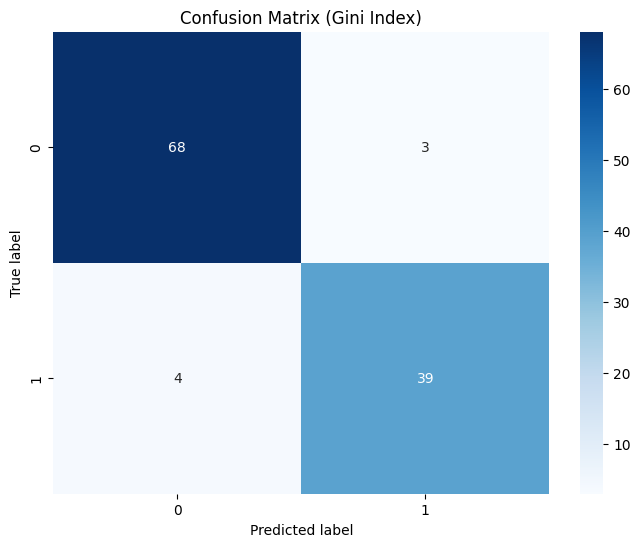

In [190]:
cm = confusion_matrix(y_test, y_pred_gini)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Gini Index)')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()
# Confusionn matrix of gini index results in 107 right predcitions out of 114 datas

## 3. Naive Bayes

In [191]:
nb = GaussianNB()
nb.fit(X_train, y_train)
# Modelling using Naive Bayes Classifier

GaussianNB()

In [192]:
y_pred_nb = nb.predict(X_test)
# Predicts the 'X_test' using the Naive Bayes Classifier model

In [193]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(f"Model accuracy score: {accuracy_nb:.4f}")
# Shows the accuracy score based on the 'y_test' and 'y_pred'
# Resulting with 97% accuracy

Model accuracy score: 0.9737


In [194]:
y_train_nb = nb.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_nb)
training_accuracy = accuracy_score(y_train, y_train_nb)

print('Testing set score: {0:0.4f}'.format(test_accuracy))
print('Training set score: {0:0.4f}'.format(training_accuracy))
# The margin is only less than 5%, so we conclude that the model is well-fitted

Testing set score: 0.9737
Training set score: 0.9363


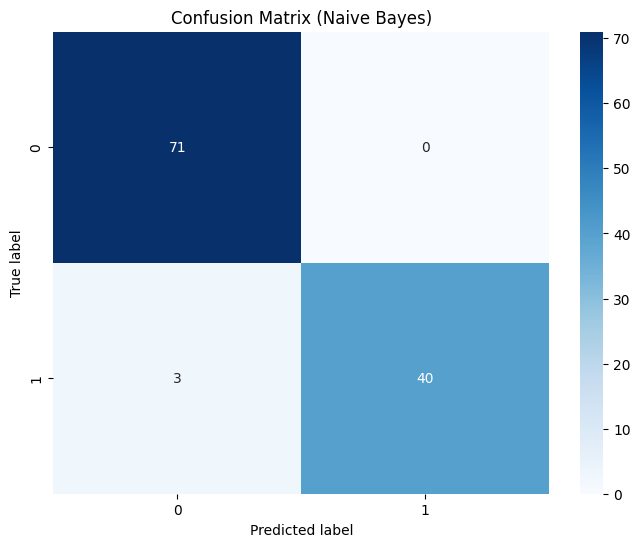

In [195]:
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Naive Bayes)')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()
# Confusionn matrix of naive bayes results in 111 right predcitions out of 114 datas

## 4. KNN

In [196]:
from sklearn.neighbors import KNeighborsClassifier

k = 9
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
# Modelling using KNN
# Using k = 9 because it produces best overall performance
# And then predicts the 'X_test' using the KNN

In [197]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Model accuracy score: {accuracy_knn:.4f}")
# Prints accuracy score of KNN which is 95%

Model accuracy score: 0.9561


In [198]:
y_train_knn = knn.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_knn)
training_accuracy = accuracy_score(y_train, y_train_knn)

print('Testing set score: {0:0.4f}'.format(test_accuracy))
print('Training set score: {0:0.4f}'.format(training_accuracy))
# The margin is only almost 5%, so we conclude that the model is well-fitted

Testing set score: 0.9561
Training set score: 0.9319


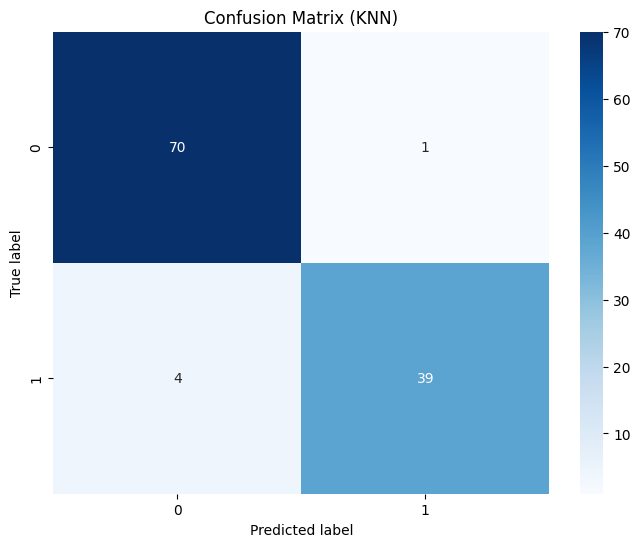

In [199]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()
# Confusionn matrix of KNN results in 109 right predcitions out of 114 datas

## Conclusion

In [200]:
mat_entropy = confusion_matrix(y_test, y_pred_en)
mat_gini = confusion_matrix(y_test, y_pred_gini)
mat_nb = confusion_matrix(y_test, y_pred_nb)
mat_knn = confusion_matrix(y_test, y_pred_knn)

print("Confusion Matrix Entropy:")
print(mat_entropy)
# Shows confusion matrix of the Criterion Entropy

print("\nConfusion Matrix Gini:")
print(mat_gini)
# Shows confusion matrix of the Gini Index

print("\nConfusion Matrix Naive Bayes:")
print(mat_nb)
# Shows confusion matrix of the Naive Baiyes

print("\nConfusion Matrix KNN:")
print(mat_knn)
# Shows confusion matrix of the KNN

Confusion Matrix Entropy:
[[70  1]
 [ 4 39]]

Confusion Matrix Gini:
[[68  3]
 [ 4 39]]

Confusion Matrix Naive Bayes:
[[71  0]
 [ 3 40]]

Confusion Matrix KNN:
[[70  1]
 [ 4 39]]


In [201]:
print("Classification Report Entropy")
print(classification_report(y_test, y_pred_en))
# Classification report of the Criterion Entropy
# It shows the precision, recall, f1-score, and support values of the model.

print("\nClassification Report Gini")
print(classification_report(y_test, y_pred_gini))
# Classification report of the Gini Index
# It shows the precision, recall, f1-score, and support values of the model.

print("\nClassification Report Naive Bayes")
print(classification_report(y_test, y_pred_nb))
# Classification report of the Naive Bayes
# It shows the precision, recall, f1-score, and support values of the model.

print("\nClassification Report KNN")
print(classification_report(y_test, y_pred_knn))
# Classification report of the KNN
# It shows the precision, recall, f1-score, and support values of the model.

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Classification Report Gini
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


Classification Report Naive Bayes
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97  

**Based on the classification reports provided for the four classifiers (Entropy, Gini, Naive Bayes, and KNN), we can draw the following conclusions regarding their performance on this specific dataset:**

* Accuracy: All classifiers achieved high accuracy, with Naive Bayes scoring the highest at 0.97, followed closely by Entropy and KNN (both at 0.96), and Gini at 0.94. This indicates that all models performed well in terms of overall correctness.
* Macro Average: The macro average scores are impressive, particularly for Naive Bayes, which has a macro average f1-score of 0.97. This suggests that Naive Bayes performs exceptionally well across both classes, maintaining a balance in performance.
* The macro averages for Entropy and KNN are also strong (around 0.95), indicating consistent performance across classes.
Weighted Average: The weighted averages are similarly high for all classifiers, with Naive Bayes again leading at 0.97. This indicates that the classifiers maintain their performance even when accounting for class imbalance.

Class-Specific Performance
Class 0 (Negative Class):
* Precision and recall for class 0 are consistently high across all classifiers, indicating effective identification of this majority class.
The f1-scores for class 0 are also very high, suggesting a good balance between precision and recall.

Class 1 (Positive Class):
* The performance for class 1 is also strong across all classifiers, with precision values ranging from 0.93 (Gini) to 1.00 (Naive Bayes).
Recall for class 1 is high as well, especially for Naive Bayes (0.93), indicating that the classifiers are successful in identifying most of the positive instances.
* The f1-scores for class 1 are similarly high, reflecting a good performance in capturing this minority class.

Conclusion
* Naive Bayes emerges as the best-performing classifier in this scenario, achieving the highest accuracy, precision, recall, and f1-scores across both classes. Its ability to perfectly identify class 0 and maintain a high recall for class 1 is noteworthy.
* All classifiers demonstrate strong performance, particularly in the context of this dataset with relatively balanced class support (71 instances of class 0 and 43 instances of class 1).
* Given the high performance of all models, Naive Bayes could be the preferred choice due to its superior metrics. However, it is also beneficial to consider the specific use case and requirements (e.g., interpretability, speed) when selecting a model for deployment. All models could be further evaluated in a cross-validation setting to ensure robustness and generalizability to unseen data.